## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [15]:
!pip install yfinance

   ---------------------------------------- 0.0/117.9 kB ? eta -:--:--
   -------------------- ------------------- 61.4/117.9 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 117.9/117.9 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB 5.2 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 5.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 5.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/176.8 kB ? eta -:--:--
   ------------------------------ --------- 133.1/176.8 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 176.8/176.8 kB 2.6 MB/s eta 0:00:00
  Attempting u

In [1]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
# 구글 주식 데이터 로딩
goog = yf.download("GOOG", start="2004-01-01", end="2024-12-31")
goog.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.487352,2.579567,2.378775,2.478923,897427216
2004-08-20,2.684922,2.704009,2.491318,2.503960,458857488
2004-08-23,2.711942,2.813082,2.703266,2.745407,366857939
2004-08-24,2.599647,2.766478,2.567421,2.757554,306396159
2004-08-25,2.627658,2.677238,2.575105,2.601877,184645512


In [16]:
# [+] 종가(Close) 데이터만 사용하기
goog = goog['Close']
goog

Ticker,GOOG
Date,
2004-08-19,2.487352
2004-08-20,2.684922
2004-08-23,2.711942
2004-08-24,2.599647
2004-08-25,2.627658
...,...
2024-12-23,195.766968
2024-12-24,197.345184
2024-12-26,196.875717


<Axes: xlabel='Date'>

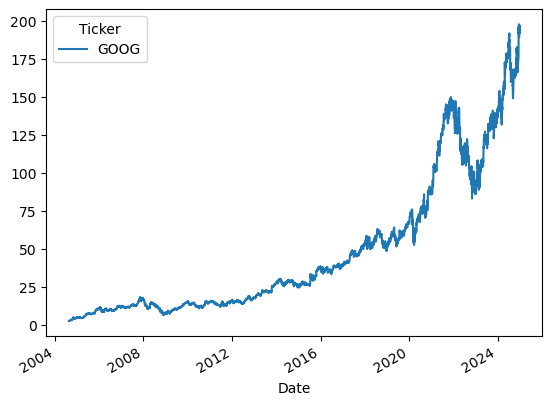

In [17]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

<Axes: xlabel='Date'>

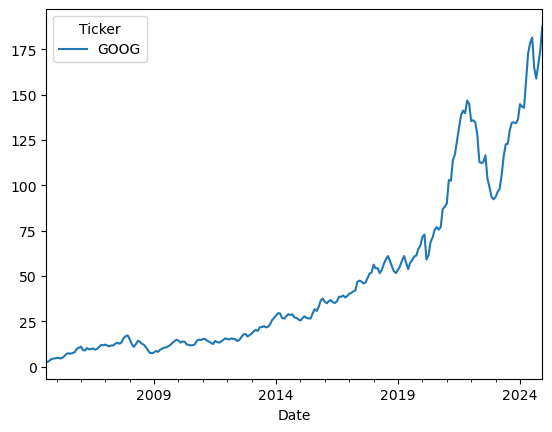

In [22]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('M').mean().plot()
goog_downsampled

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


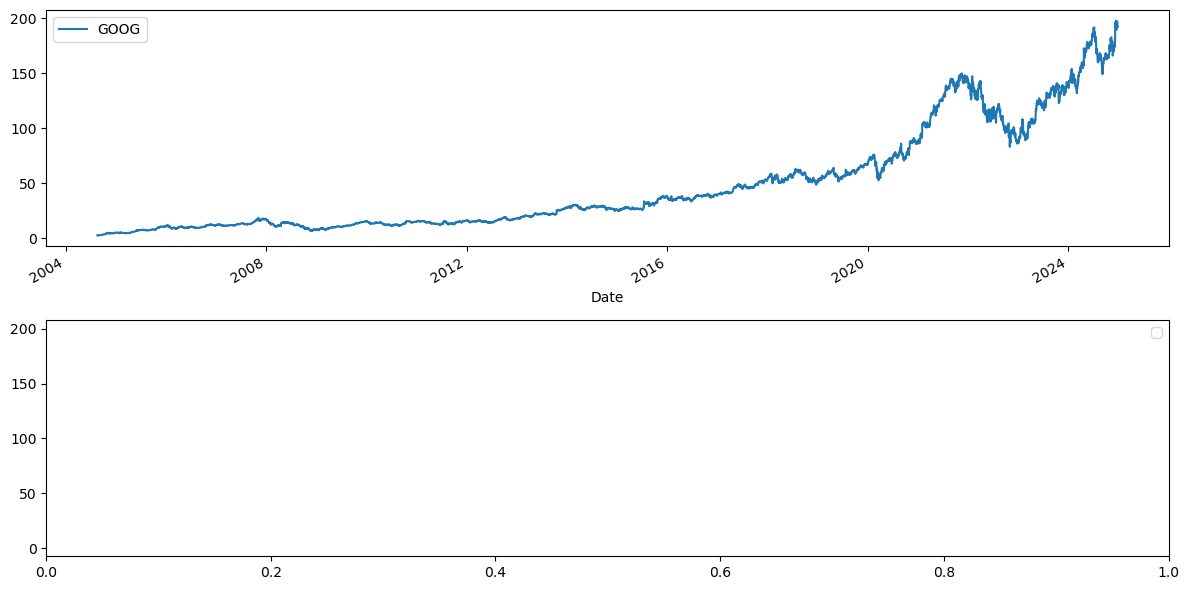

In [23]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

Ticker            GOOG
Date                  
2004-08-31    2.537673
2004-09-30    3.212684
2004-10-31         NaN
2004-11-30    4.511144
2004-12-31    4.779117
...                ...
2024-07-31  172.529846
2024-08-31         NaN
2024-09-30  166.810501
2024-10-31  172.298019
2024-11-30         NaN

[244 rows x 1 columns]


<Axes: xlabel='Date'>

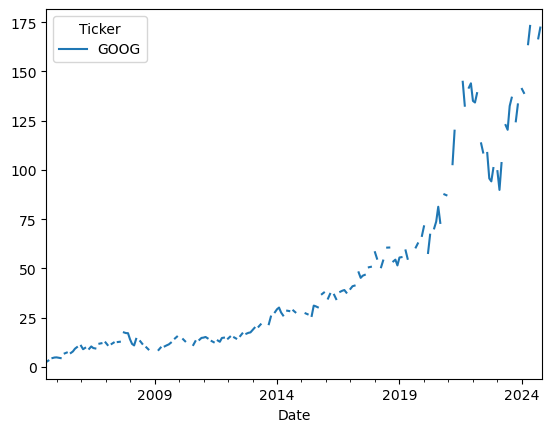

In [25]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('M')
print(goog_downsampled)

goog_downsampled.plot()

In [26]:
# [+] 업샘플링: resample()
goog_upsampled = goog.resample('12h').mean()  #옛날 버전은 H(대문자)
print(goog_upsampled)

Ticker                     GOOG
Date                           
2004-08-19 00:00:00    2.487352
2004-08-19 12:00:00         NaN
2004-08-20 00:00:00    2.684922
2004-08-20 12:00:00         NaN
2004-08-21 00:00:00         NaN
...                         ...
2024-12-28 00:00:00         NaN
2024-12-28 12:00:00         NaN
2024-12-29 00:00:00         NaN
2024-12-29 12:00:00         NaN
2024-12-30 00:00:00  192.470734

[14877 rows x 1 columns]


#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [27]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

Ticker,GOOG
Date,
2004-08-19,NaN
2004-08-20,NaN
2004-08-23,NaN
2004-08-24,NaN
2004-08-25,NaN
...,...
2024-12-23,121.102890
2024-12-24,119.559219
2024-12-26,120.009575


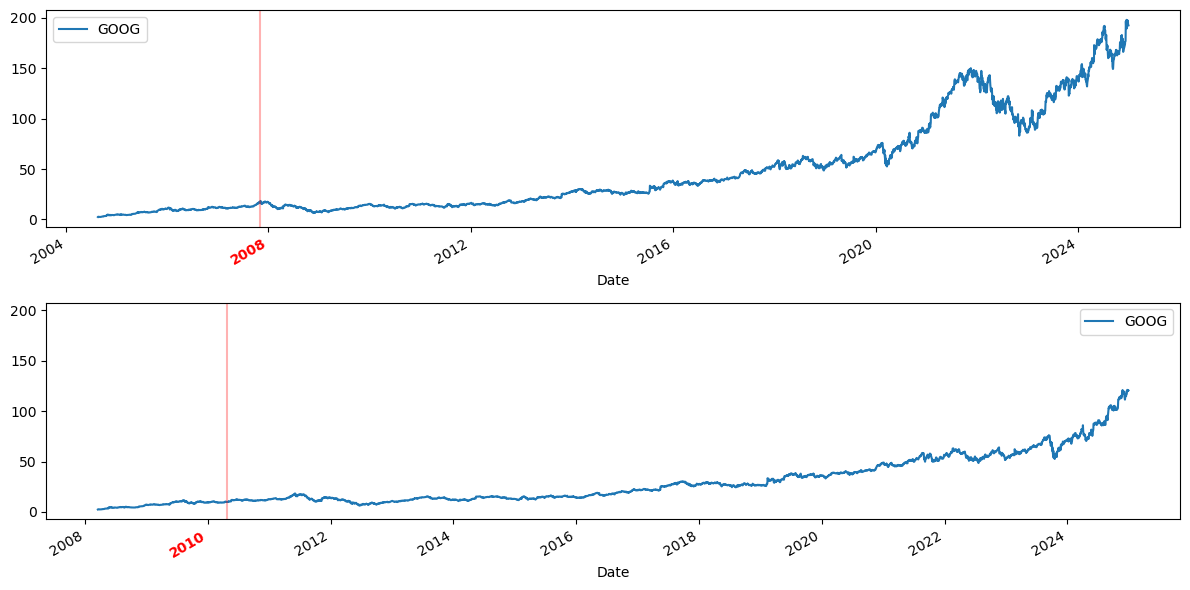

In [28]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [29]:
# shifting 응용: 주가 변화율 계산
goog_shifted = goog.shift(periods=1) # [+] 시프팅
(goog - goog_shifted)/goog_shifted # [+] 주가 변화율 계산 #비교

Ticker,GOOG
Date,
2004-08-19,NaN
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
...,...
2024-12-23,0.015703
2024-12-24,0.008062
2024-12-26,-0.002379


Ticker          GOOG
Date                
2004-08-19       NaN
2004-08-20  0.197570
2004-08-23  0.027020
2004-08-24 -0.112295
2004-08-25  0.028012
...              ...
2024-12-23  3.026550
2024-12-24  1.578217
2024-12-26 -0.469467
2024-12-27 -3.056534
2024-12-30 -1.348450

[5126 rows x 1 columns]


<Axes: xlabel='Date'>

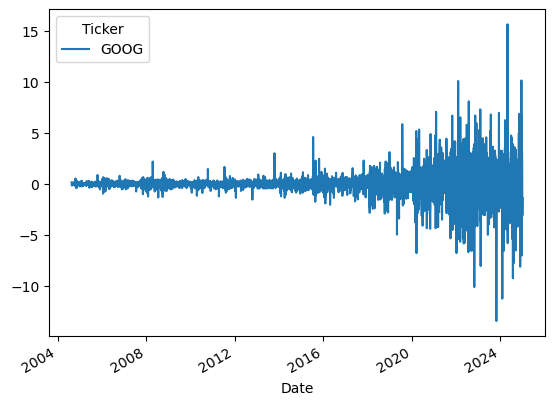

In [30]:
# shifting 응용: 차분 시계열 구하기
goog_diff = goog - goog_shifted # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

Rolling [window=365,center=False,axis=0,method=single]


<Axes: xlabel='Date'>

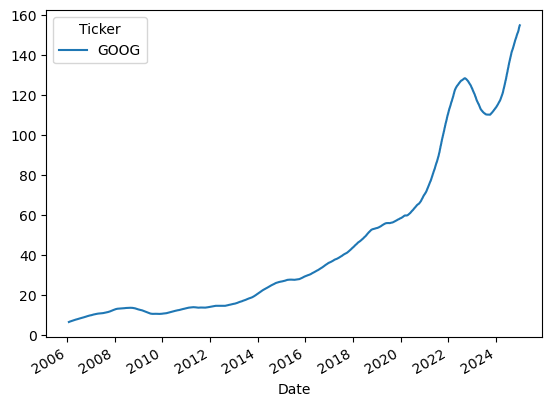

In [31]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

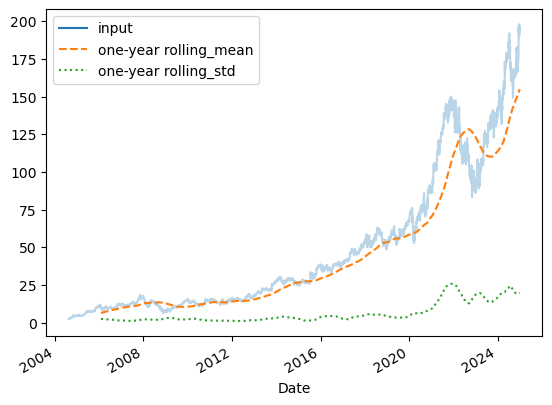

In [32]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)